## Imports

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mutual_info_score
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from IPython.display import display
rom google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master (3).csv


# Load and inspect the data

In [114]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

In [115]:
df.head().T

,0,1,2,3,4
CustomerID,2.0,3.0,4.0,5.0,6.0
Age,30.0,65.0,55.0,58.0,23.0
Gender,Female,Female,Female,Male,Male
Tenure,39.0,49.0,14.0,38.0,32.0
Usage Frequency,14.0,1.0,4.0,21.0,20.0
Support Calls,5.0,10.0,6.0,7.0,5.0
Payment Delay,18.0,8.0,18.0,7.0,8.0
Subscription Type,Standard,Basic,Basic,Standard,Basic
Contract Length,Annual,Monthly,Quarterly,Monthly,Monthly
Total Spend,932.0,557.0,185.0,396.0,617.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [117]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,NaN,NaN,NaN,225398.667955,129531.91855,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,NaN,NaN,NaN,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Gender,440832,2,Male,250252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,440832.0,NaN,NaN,NaN,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,NaN,NaN,NaN,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,NaN,NaN,NaN,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,NaN,NaN,NaN,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Subscription Type,440832,3,Standard,149128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract Length,440832,3,Annual,177198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Spend,440832.0,NaN,NaN,NaN,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0


Customer ID

In [118]:
df.drop('CustomerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
Age,30.0,65.0,55.0,58.0,23.0
Gender,Female,Female,Female,Male,Male
Tenure,39.0,49.0,14.0,38.0,32.0
Usage Frequency,14.0,1.0,4.0,21.0,20.0
Support Calls,5.0,10.0,6.0,7.0,5.0
Payment Delay,18.0,8.0,18.0,7.0,8.0
Subscription Type,Standard,Basic,Basic,Standard,Basic
Contract Length,Annual,Monthly,Quarterly,Monthly,Monthly
Total Spend,932.0,557.0,185.0,396.0,617.0
Last Interaction,17.0,6.0,3.0,29.0,20.0


Missing values

In [119]:
df.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [120]:
df = df.dropna()


In [121]:
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [122]:
df.duplicated().sum()

np.int64(0)

# EDA (Exploratory Data Analysis)

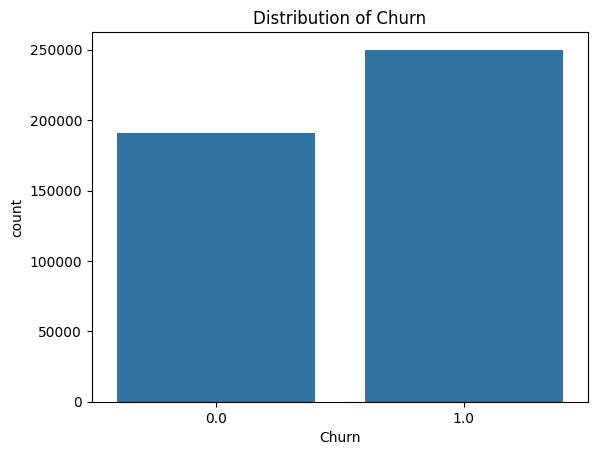

In [123]:
sns.countplot(x= 'Churn', data = df)
plt.title('Distribution of Churn')

plt.show()

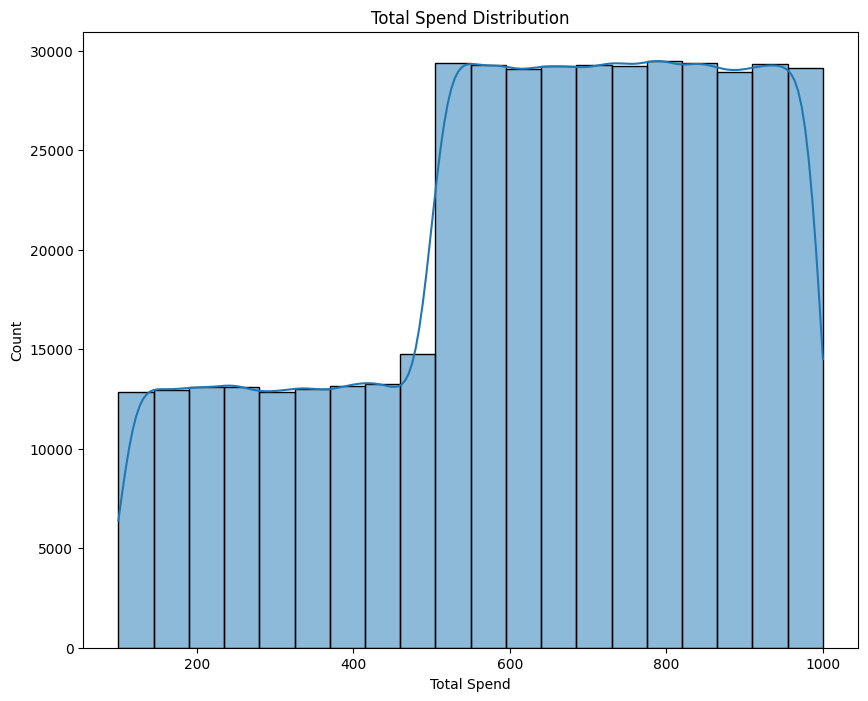

In [124]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Total Spend'], kde=True, bins=20)
plt.title('Total Spend Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.show()


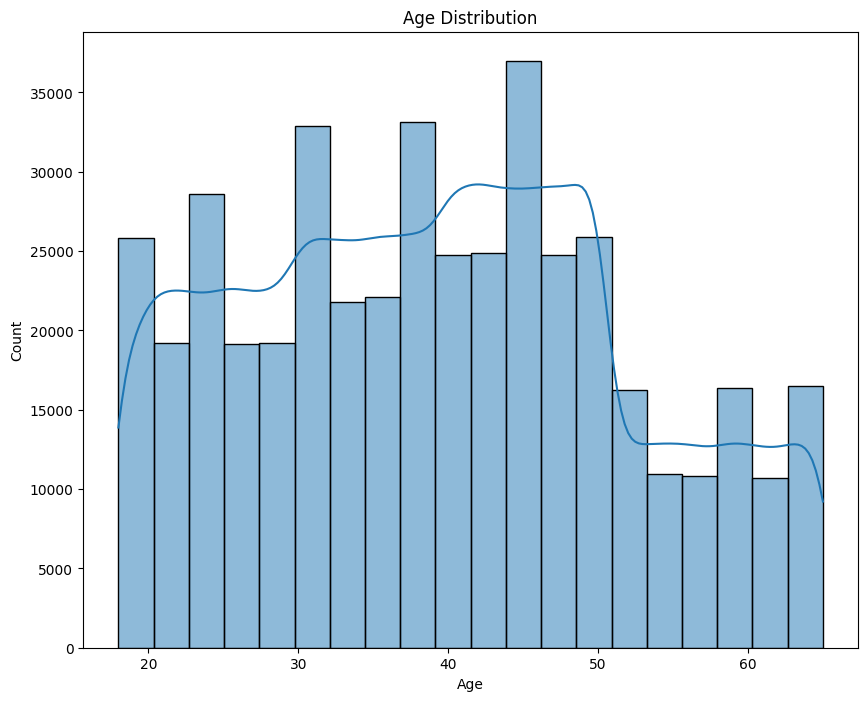

In [125]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


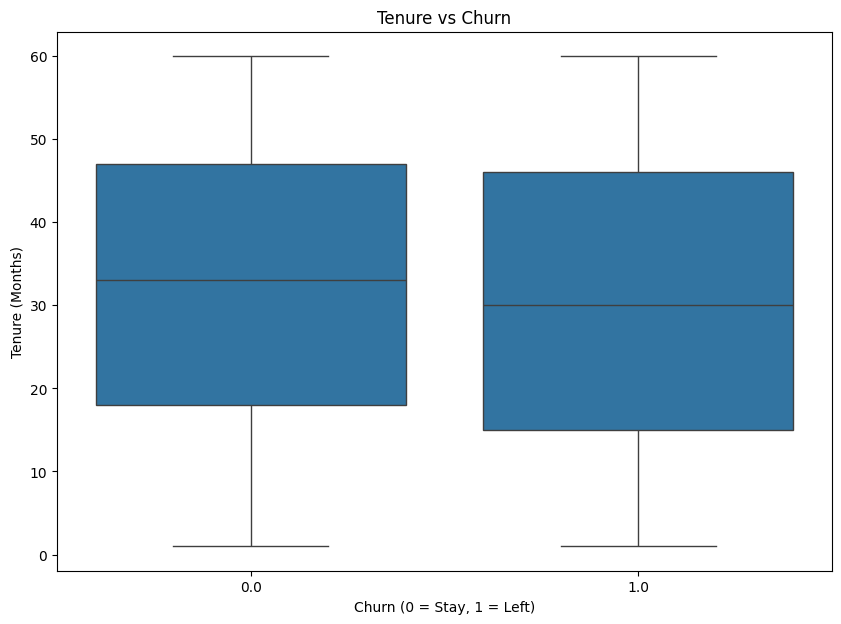

In [126]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = Stay, 1 = Left)')
plt.ylabel('Tenure (Months)')
plt.show()


In [127]:
categorical= df.select_dtypes(include=['object']).columns.tolist()
numerical=df.select_dtypes(include=['number']).columns.tolist()

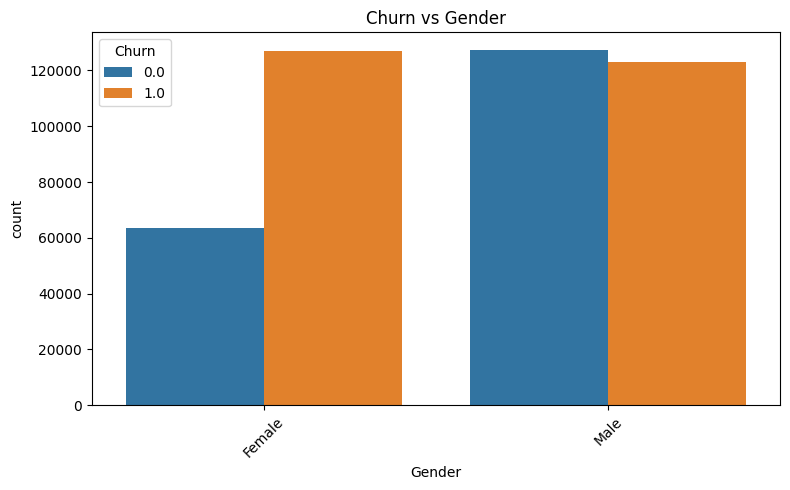

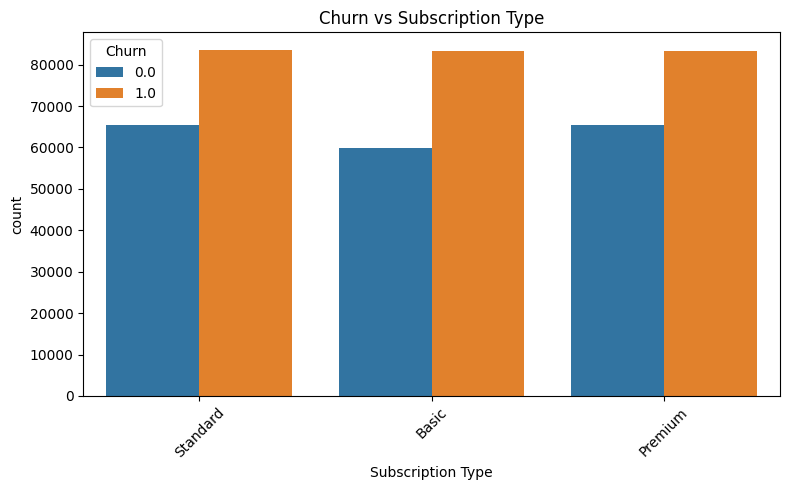

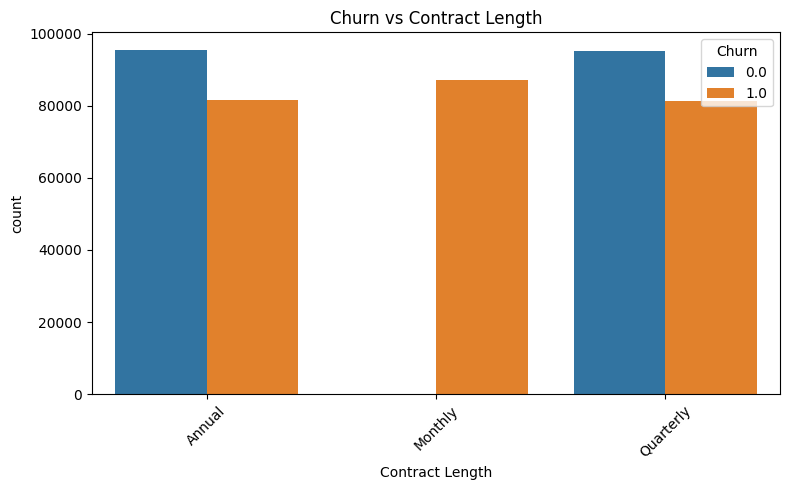

In [128]:
for feature in categorical:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=feature, hue = 'Churn'  )
  plt.title(f'Churn vs {feature}')
  plt.xticks(rotation = 45)
  plt.tight_layout()
  plt.show()


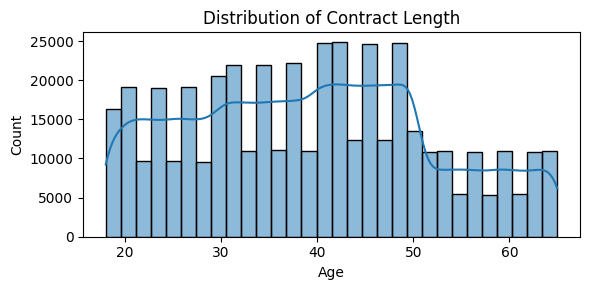

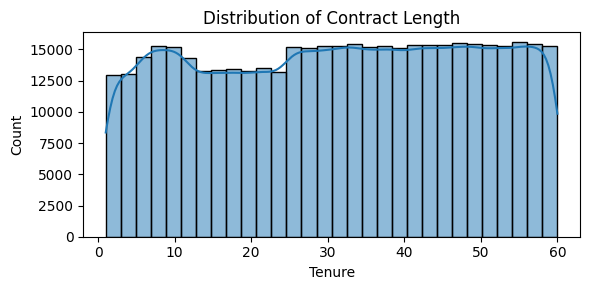

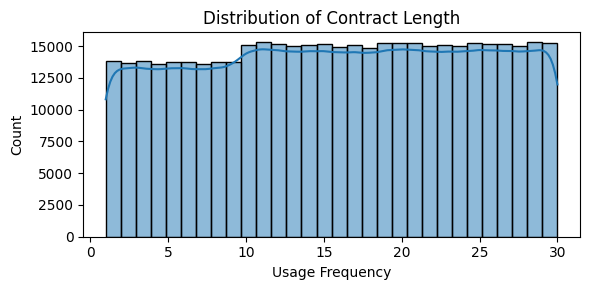

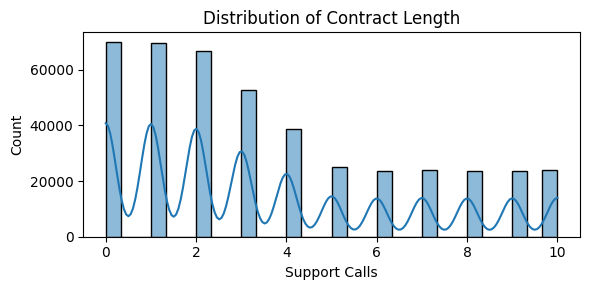

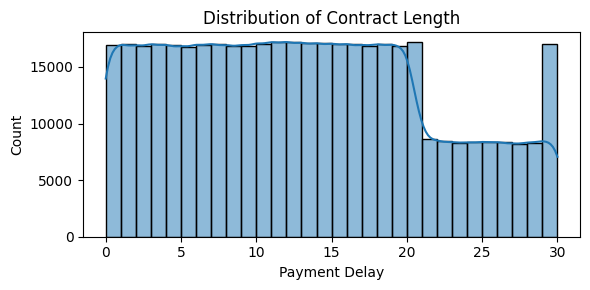

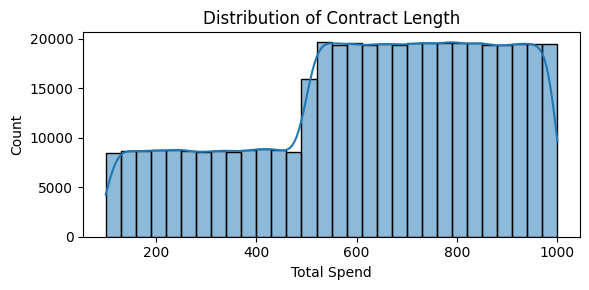

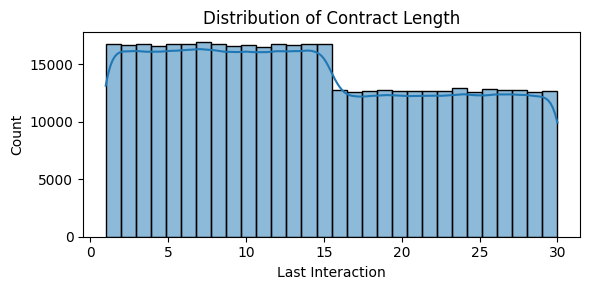

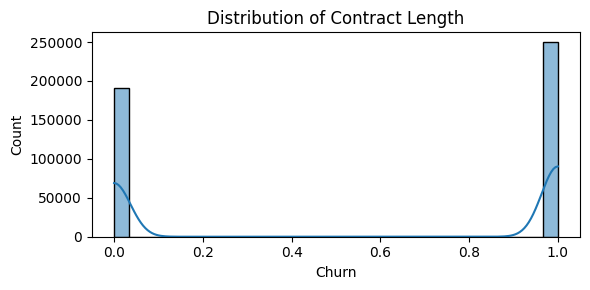

In [129]:
for num in numerical:
  plt.figure(figsize=(6, 3))
  sns.histplot(df[num], kde = True, bins = 30  )
  plt.title(f'Distribution of {feature}')
  plt.tight_layout()
  plt.show()


In [130]:
df[categorical].nunique()

,0
Gender,2
Subscription Type,3
Contract Length,3


# Feature Importance

Risk Ratio

In [131]:
global_mean = df['Churn'].mean()
round(global_mean, 2)

np.float64(0.57)

In [132]:
churn_gender =df.groupby('Gender')['Churn'].mean()
churn_gender

,Churn
Gender,
Female,0.666691
Male,0.491269


In [133]:
# Risk ratio = group rate/ global rate
risk_ratio = churn_gender / global_mean
risk_ratio


,Churn
Gender,
Female,1.175600
Male,0.866271


In [134]:
for feature in categorical:
    df_group = df.groupby(feature)['Churn'].mean().to_frame(name='mean')
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk_ratio'] = df_group['mean'] / global_mean
    display(df_group)


,mean,diff,risk_ratio
Gender,,,
Female,0.666691,0.099584,1.175600
Male,0.491269,-0.075838,0.866271


,mean,diff,risk_ratio
Subscription Type,,,
Basic,0.581782,0.014675,1.025877
Premium,0.559417,-0.007690,0.986440
Standard,0.560700,-0.006408,0.988701


,mean,diff,risk_ratio
Contract Length,,,
Annual,0.460761,-0.106346,0.812477
Monthly,1.000000,0.432893,1.763335
Quarterly,0.460256,-0.106851,0.811586


/tmp/ipython-input-135-1061815446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=df_group, x=feature, y='mean' , palette = "Reds")


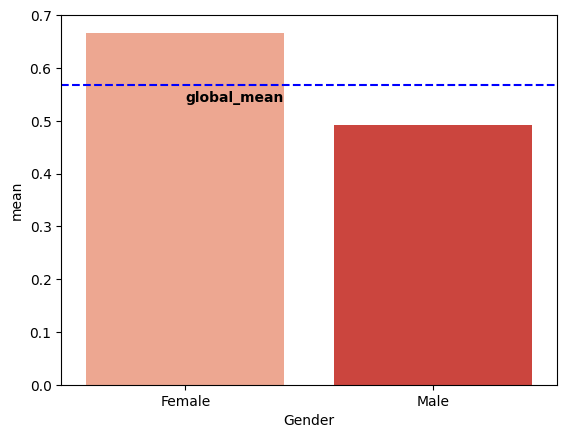

/tmp/ipython-input-135-1061815446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=df_group, x=feature, y='mean' , palette = "Reds")


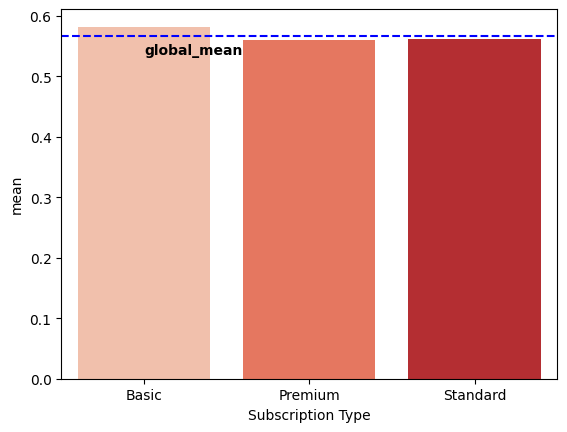

/tmp/ipython-input-135-1061815446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=df_group, x=feature, y='mean' , palette = "Reds")


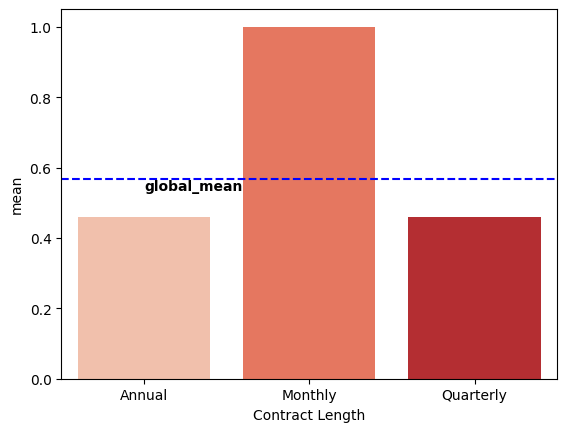

In [135]:
for feature in categorical:
    df_group = df.groupby(by=feature)['Churn'].agg(['mean']).reset_index()
    graph = sns.barplot(data=df_group, x=feature, y='mean' , palette = "Reds")
    graph.axhline(global_mean, color='b', linestyle='--')
    plt.text(0 , global_mean - 0.03, "global_mean" , color = "Black", weight= "semibold")
    plt.show()

Mutual Information

In [136]:
categorical = ['Gender', 'Subscription Type', 'Contract Length']


def calculate_mi(series):
    return mutual_info_score(series, df['Churn'])


df_mi = df[categorical].apply(calculate_mi)


df_mi = df_mi.sort_values(ascending=False).to_frame(name='Mutual Information')


display(df_mi)


,Mutual Information
Contract Length,0.130430
Gender,0.015543
Subscription Type,0.000212


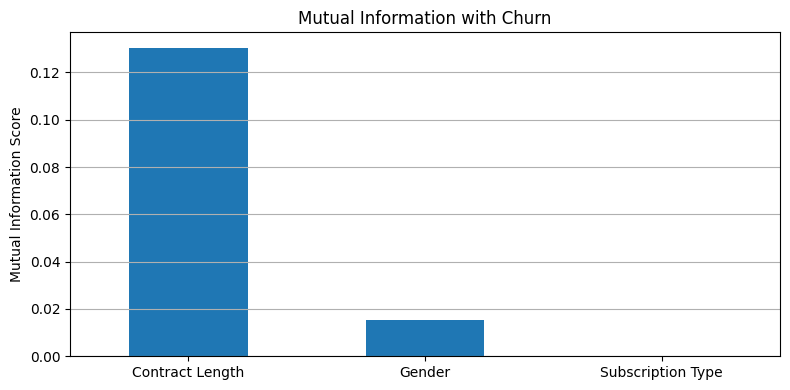

In [137]:
df_mi.plot(kind='bar', figsize=(8, 4), legend=False )
plt.title("Mutual Information with Churn")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Correlation Coefficient

In [138]:
df[numerical].corrwith(df['Churn'])

,0
Age,0.218394
Tenure,-0.051919
Usage Frequency,-0.046101
Support Calls,0.574267
Payment Delay,0.312129
Total Spend,-0.429355
Last Interaction,0.149616
Churn,1.000000


Correlation Matrix

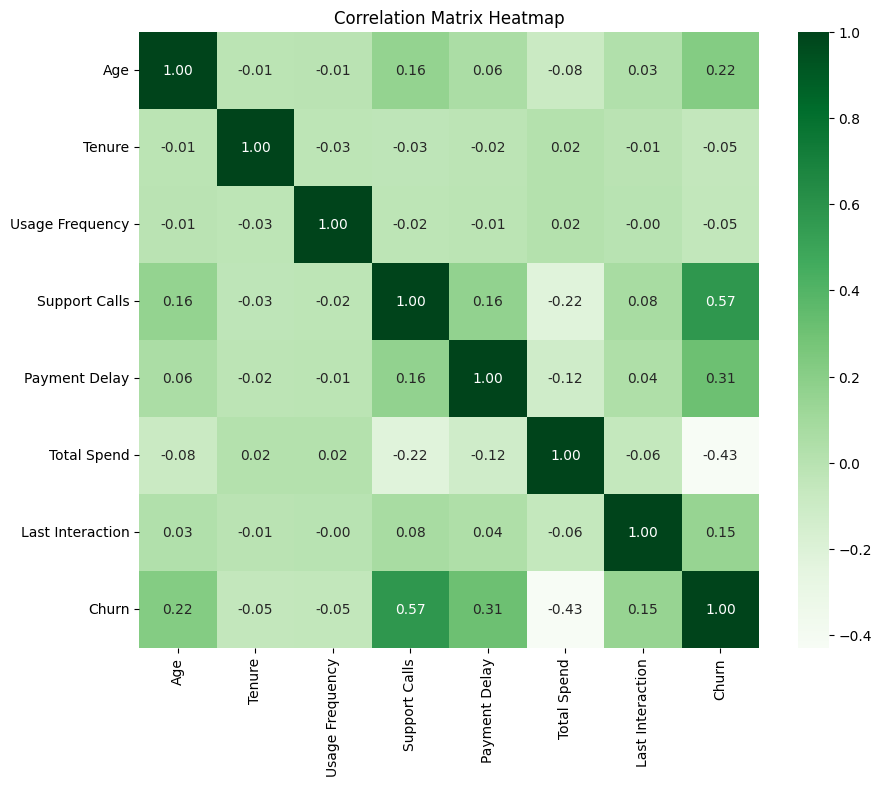

In [139]:
inumeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Preprocessing

Handling categorical Variable one-hot encoding

In [140]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,False,False,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,True,False,True,True,False
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,True,True,False,False,False
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,False,True,False,False,False
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,True,False,True,False,True
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0.0,True,False,True,False,True


In [141]:
df_encoded = df_encoded.astype(int)
df_encoded

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932,17,1,0,0,1,0,0
1,65,49,1,10,8,557,6,1,0,0,0,1,0
2,55,14,4,6,18,185,3,1,0,0,0,0,1
3,58,38,21,7,7,396,29,1,1,0,1,1,0
4,23,32,20,5,8,617,20,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42,54,15,1,3,716,8,0,1,1,0,0,0
440829,25,8,13,1,20,745,2,0,0,1,0,0,0
440830,26,35,27,1,5,977,9,0,1,0,1,0,1
440831,28,55,14,2,0,602,2,0,1,0,1,0,1


Train Test

In [142]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [143]:
 X_train.shape

(352665, 12)

In [144]:
X_test.shape

(88167, 12)

Random Forest

In [145]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [146]:
y_pred = model.predict(X_test)

In [147]:
confusion_matrix(y_test, y_pred)

array([[38063,     0],
       [   43, 50061]])

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38063
           1       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



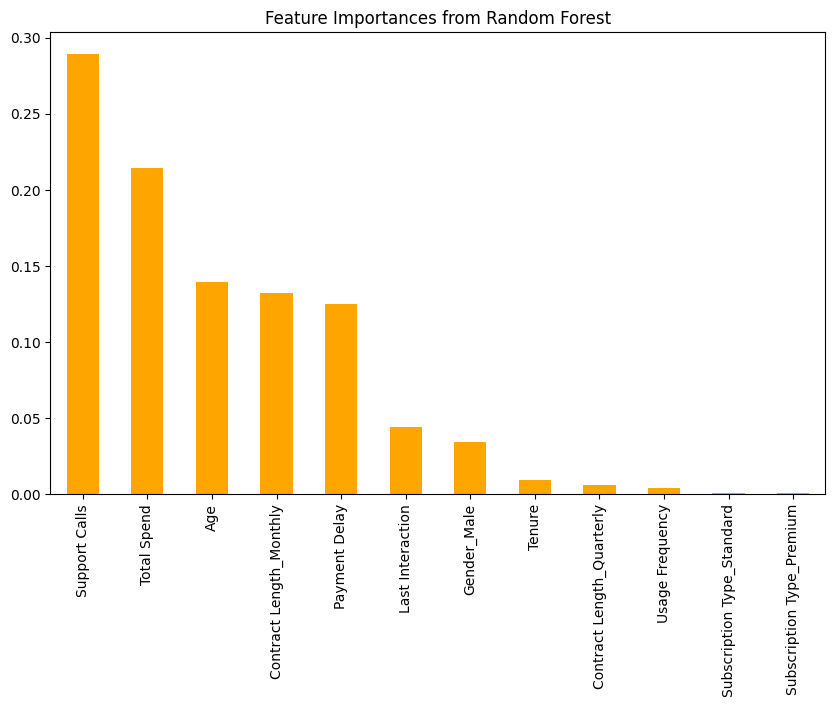

In [149]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Feature Importances from Random Forest")
plt.show()


Standard Scaling

In [150]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [151]:
X_train_scaled

array([[-1.23471814,  1.55009444,  1.41934063, ..., -0.71409296,
        -0.49581842, -0.81875097],
       [-1.23471814, -0.30526941, -0.44376726, ..., -0.71409296,
        -0.49581842,  1.22137261],
       [-1.71694146,  0.2745318 , -0.90954423, ..., -0.71409296,
        -0.49581842,  1.22137261],
       ...,
       [-0.18990094, -1.29093145, -1.3753212 , ..., -0.71409296,
         2.01686737, -0.81875097],
       [-0.51138316, -0.24728929, -1.25887696, ..., -0.71409296,
        -0.49581842, -0.81875097],
       [ 0.93528681,  1.4341342 ,  1.18645215, ...,  1.4003779 ,
        -0.49581842, -0.81875097]])

In [152]:
X_test_scaled

array([[-1.31508869, -1.23295133,  0.02200972, ..., -0.71409296,
        -0.49581842,  1.22137261],
       [-0.51138316, -1.63881217,  0.48778669, ..., -0.71409296,
        -0.49581842,  1.22137261],
       [-0.99360648,  1.49211432, -1.49176544, ...,  1.4003779 ,
        -0.49581842, -0.81875097],
       ...,
       [-1.31508869,  0.2745318 ,  0.13845396, ..., -0.71409296,
        -0.49581842,  1.22137261],
       [ 1.8193629 ,  1.31817396,  0.72067517, ..., -0.71409296,
        -0.49581842, -0.81875097],
       [-0.2702715 , -0.18930917,  0.13845396, ...,  1.4003779 ,
        -0.49581842,  1.22137261]])

In [153]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled[:5])

(352665, 12)
(88167, 12)
[[-1.23471814  1.55009444  1.41934063 -1.17330131 -1.08616346  0.13989838
   1.68975907  0.87230805 -0.71384402 -0.71409296 -0.49581842 -0.81875097]
 [-1.23471814 -0.30526941 -0.44376726 -0.84767154  1.57810352  0.50951127
  -0.28778479  0.87230805 -0.71384402 -0.71409296 -0.49581842  1.22137261]
 [-1.71694146  0.2745318  -0.90954423 -1.17330131 -0.72285432  0.91650075
  -0.63676312  0.87230805  1.40086626 -0.71409296 -0.49581842  1.22137261]
 [-0.2702715  -0.76911037 -0.79309998 -0.52204177  1.21479438  0.52612309
  -1.33471977 -1.146384    1.40086626 -0.71409296  2.01686737 -0.81875097]
 [ 1.41751013 -0.24728929  1.18645215  1.43173685  0.24597003  0.23541632
  -0.52043701 -1.146384   -0.71384402 -0.71409296  2.01686737 -0.81875097]]


#  Model Training and Evaluation

Logistic Regression

In [154]:
lr = LogisticRegression(max_iter=1000, random_state=42)


lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[34557  3506]
 [ 5626 44478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     38063
           1       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167



In [158]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=2,
    n_estimators=19,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1
)

xgb_model.fit(X_train_scaled, y_train)

cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Average ROC AUC:", cv_scores.mean())


y_pred_xgb = xgb_model.predict(X_test_scaled)
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_xgb))


Cross-validated ROC AUC scores: [0.98289659 0.98330565 0.98288043 0.98452075 0.98356829]
Average ROC AUC: 0.9834343425664056
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     38063
           1       0.99      0.89      0.94     50104

    accuracy                           0.94     88167
   macro avg       0.94      0.94      0.94     88167
weighted avg       0.94      0.94      0.94     88167



# Model Saving

In [ ]:
import joblib


joblib.dump(model, 'my_model.pkl')

